# Uber Cancellation Analysis

In [1]:
# python libraries
import pandas as pd
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
# load Shopping data
df = pd. read_csv('ncr_ride_bookings.csv')
# set index to Booking ID
df = df.set_index("Booking ID")
# view information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, "CNR5884300" to "CNR3447390"
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking Status                     150000 non-null  object 
 3   Customer ID                        150000 non-null  object 
 4   Vehicle Type                       150000 non-null  object 
 5   Pickup Location                    150000 non-null  object 
 6   Drop Location                      150000 non-null  object 
 7   Avg VTAT                           139500 non-null  float64
 8   Avg CTAT                           102000 non-null  float64
 9   Cancelled Rides by Customer        10500 non-null   float64
 10  Reason for cancelling by Customer  10500 non-null   object 
 11  Cancelled Rides by Driver  

**Data Dictionary**
|Column Name| Description|
|---|---|
|Date |Date of the booking|
|Time |Time of the booking|
|Booking ID |Unique identifier for each ride booking|
|Booking Status |Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.)|
|Customer ID |	Unique identifier for customers|
|Vehicle Type |Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan)|
|Pickup Location |	Starting location of the ride|
|Drop Location | Destination location of the ride|
|Avg VTAT |Average time for driver to reach pickup location (in minutes)|
|Avg CTAT |Average trip duration from pickup to destination (in minutes)|
|Cancelled Rides by Customer |Customer-initiated cancellation flag|
|Reason for cancelling by Customer	|Reason for customer cancellation|
|Cancelled Rides by Driver |Driver-initiated cancellation flag|
|Driver Cancellation Reason |Reason for driver cancellation|
|Incomplete Rides |Incomplete ride flag|
|Incomplete Rides Reason |Reason for incomplete rides|
|Booking Value |Total fare amount for the ride|
|Ride Distance|Distance covered during the ride (in km)|
|Driver Ratings|	Rating given to driver (1-5 scale)|
|Customer Rating|Rating given by customer (1-5 scale)|
|Payment Method|Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card)|

Dictionary Source: https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard

#### Data Information Findings
There are **21 columns** and **150000 rows** in the Uber data. Most of the data types are **strings** and **float64**. The following columns have missing values: Avg VTAT, Avg CTAT, Cancelled Rides by Customer, Reason for cancelling by Customer, Cancelled Rides by Driver, Driver Cancellation Reason, Incomplete Rides, Incomplete Rides Reason, Booking Value, Ride Distance, Driver Ratings, Customer Rating, Payment Method.  

In [3]:
df.head(5)

,Date,Time,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
Booking ID,,,,,,,,,,,,,,,,,,,,
"""CNR5884300""",2024-03-23,12:29:38,No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""CNR1326809""",2024-11-29,18:01:39,Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
"""CNR8494506""",2024-08-23,08:56:10,Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
"""CNR8906825""",2024-10-21,17:17:25,Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
"""CNR1950162""",2024-09-16,22:08:00,Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


### Exploratory Data Analysis on Vehicle Type and Booking Status

count     150000
unique         7
top         Auto
freq       37419
Name: Vehicle Type, dtype: object



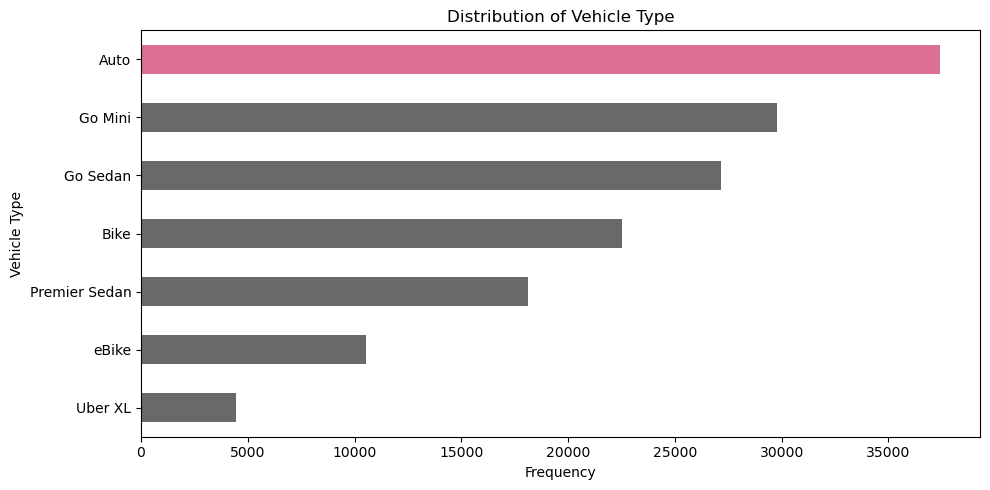

In [4]:
# 1st Categorical Column EDA: Vehicle Type
cat1 = df['Vehicle Type']
cat1_summary_stats = cat1.describe()
print(cat1_summary_stats)
print('')

# bar plot 1: Distribution of Vehicle Type
plt.figure(figsize=(10, 5))
cat1.value_counts(ascending=True).plot(kind='barh',color= ['dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','palevioletred'])
plt.title('Distribution of Vehicle Type')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

count        150000
unique            5
top       Completed
freq          93000
Name: Booking Status, dtype: object


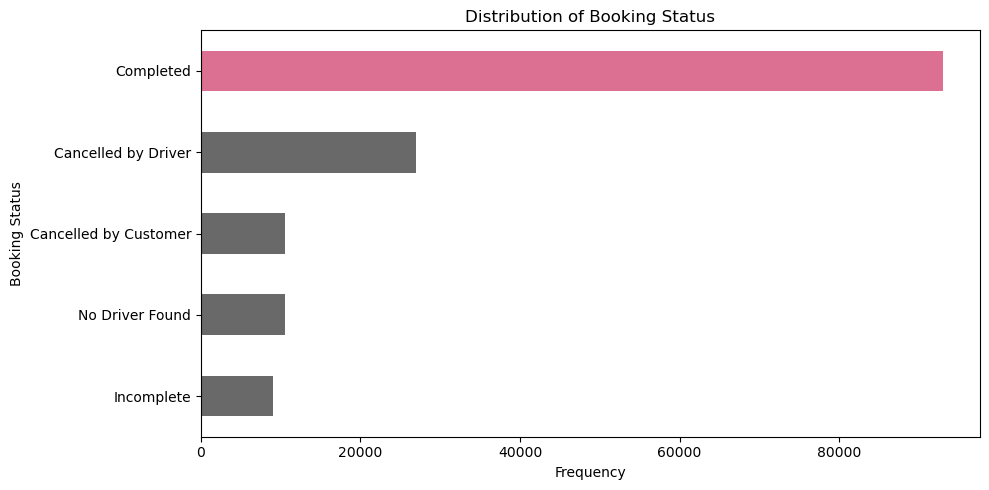

In [5]:
# 2nd categorical column: Booking Status
cat2 = df['Booking Status']
cat2_summary_stats = cat2.describe()
print(cat2_summary_stats)

# bar plot 2: Distribution of Booking Status
plt.figure(figsize=(10, 5))
cat2.value_counts(ascending=True).plot(kind='barh',color= ['dimgray','dimgray','dimgray','dimgray','palevioletred'])
plt.title('Distribution of Booking Status')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

### Categorical EDA Findings

**Auto** is the most common form of Vehicle Type customers use in service with Uber.

**Completed** is the most common form of Booking Status in service with Uber.  

In [6]:
# combine Date and Time to datetime to create a time series
df['Date_Time'] = df['Date'] + " " + df['Time']
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Date_Time'].info()

<class 'pandas.core.series.Series'>
Index: 150000 entries, "CNR5884300" to "CNR3447390"
Series name: Date_Time
Non-Null Count   Dtype         
--------------   -----         
150000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3+ MB


### Time Series: Hourly Total Bookings by Vehicle Type 


In [7]:
# Time Series Function 
# Create a pivot table and plot total bookings by vehicle type throughout the day
def pivot_bookings(data,time, column ,value, title, xlabel, ylabel):
    booking_counts = data.groupby([time, column]).size().reset_index(name=value)
    # Pivot the table to get separate columns for each vehicle type
    booking_counts_table = booking_counts.pivot(index=time, columns=column, values=value).fillna(0)
    # Plot the time series
    plt.figure(figsize=(20, 6))
    booking_counts_table.plot(kind='line', figsize=(20, 6),color=['cadetblue', 'salmon', 'yellowgreen', 'sandybrown', 'rosybrown', 'orchid', 'darkkhaki'])
    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(24))  # Show every hour
    plt.legend(title=column, loc='upper right')
    # Display the plot
    plt.show()


<Figure size 2000x600 with 0 Axes>

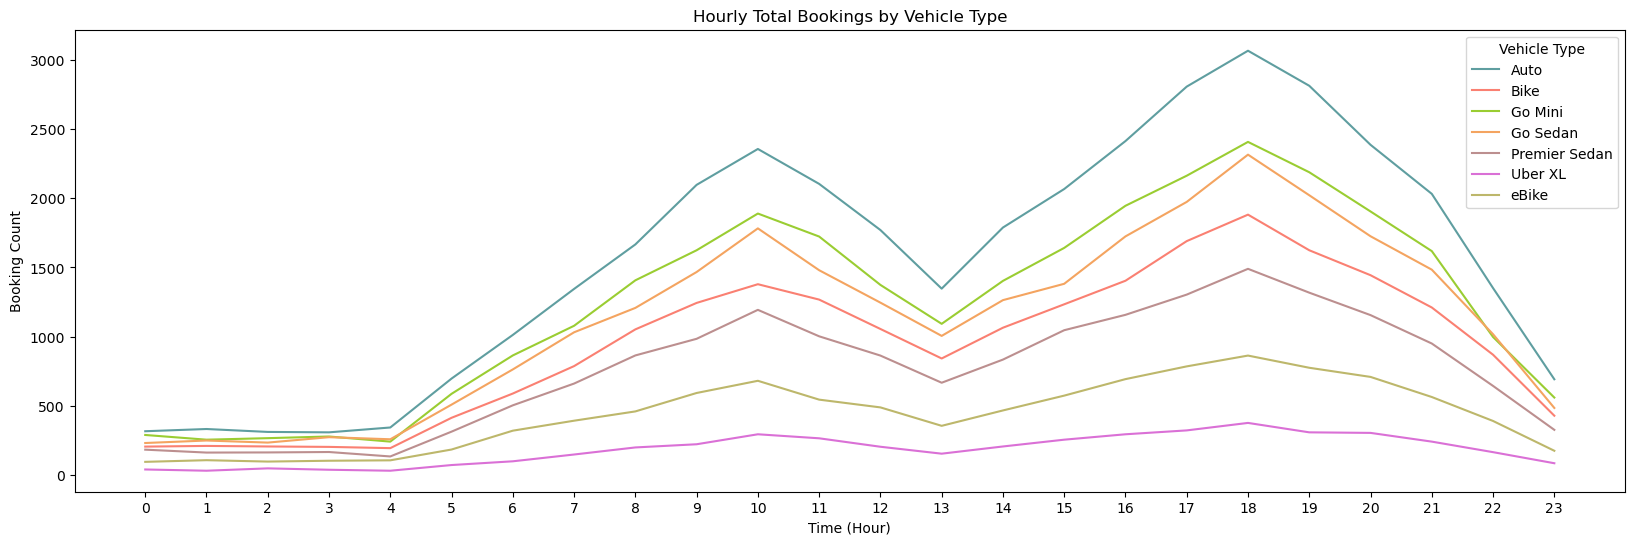

In [8]:
# Time Series by Hour
df['Hour'] = df['Date_Time'].dt.hour

# Create a pivot table and plot total bookings by vehicle type throughout the day by hour
pivot_bookings(df,'Hour','Vehicle Type','booking_count','Hourly Total Bookings by Vehicle Type','Time (Hour)','Booking Count')

### Hourly Total Bookings by Vehicle Type Findings

The peak hour of the total bookings for the Day is **10:00 (10 am)** where **Auto** is the most common Vehicle Type.

The peak hour of the total bookings for the Night is **18:00 (6 pm)** where **Auto** is the most common Vehicle Type.

### Time Series: Hourly Bookings by Vehicle Type excluding Completed Rides

<Figure size 2000x600 with 0 Axes>

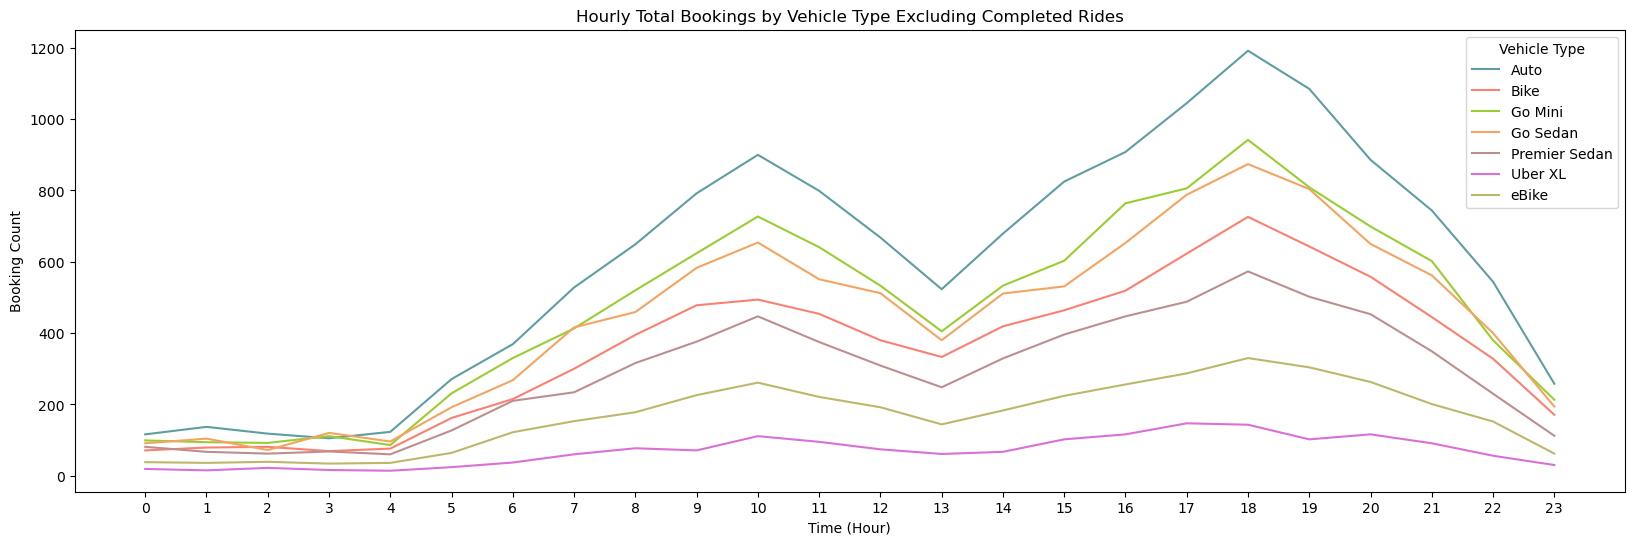

In [9]:
# filter data to omit complete booking status
df_filtered = df[df['Booking Status'] != 'Completed']

# Create a pivot table and plot total bookings by vehicle type throughout the day by hour
pivot_bookings(df_filtered,'Hour','Vehicle Type','booking_count','Hourly Total Bookings by Vehicle Type Excluding Completed Rides','Time (Hour)','Booking Count')

### Hourly Bookings by Vehicle Type excluding Completed Rides

The peak hour of the total bookings excluding Completed Rides for the Day is **10:00 (10 am)** where **Auto** is the most common Vehicle Type.

The peak hour of the total bookings excluding Completed Rides for the Night is **18:00 (6 pm)** where **Auto** is the most common Vehicle Type.

### Bar Chart: Booking Status during DAY Peak Hour by Vehicle Type excluding Completed Rides

In [10]:
# Create a function that takes a specific hour to determine total bookings by Vehicle Type and Booking Status excluding completed rides
def hour_bookings(hour,title):
    # Filter data for a specific hour
    df_hour = df[df['Hour'] == hour]

    # Filter data to exclude "Completed" Booking Status
    df_exc_com = df_hour[df_hour["Booking Status"] != "Completed"]

    # Group by 'Vehicle Type' and 'Booking Status', then count occurrences
    status_counts = df_exc_com.groupby(['Vehicle Type', 'Booking Status']).size().reset_index(name='count')

    # Pivot the table to have 'Vehicle Type' as the index and 'Booking Status' as columns
    status_counts_table = status_counts.pivot(index='Vehicle Type', columns='Booking Status', values='count').fillna(0)

    # Plotting the bar chart
    status_counts_table.plot(kind='bar', stacked=True, figsize=(10, 7),color=['salmon', 'sandybrown', 'rosybrown', 'darkkhaki'])

    # Customize the plot 
    plt.title(title)
    plt.xlabel('Vehicle Type')
    plt.ylabel('Booking Count')
    plt.xticks(rotation=0)  # Keep the vehicle types horizontal
    plt.legend(title='Booking Status', loc='upper right')

    # Display the plot
    plt.show()

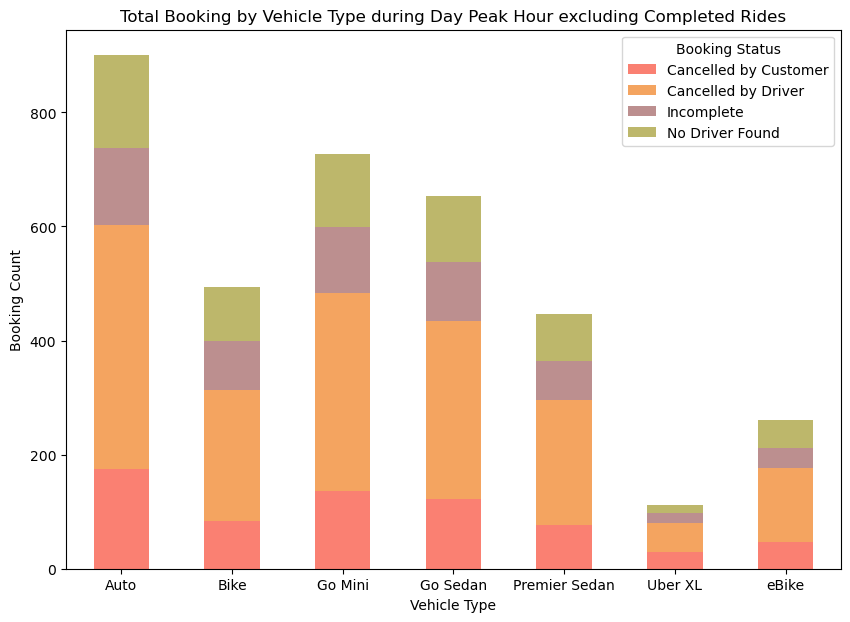

In [11]:
hour_bookings(10,'Total Booking by Vehicle Type during Day Peak Hour excluding Completed Rides')

### Bar Chart: Booking Status during NIGHT Peak Hour by Vehicle Type excluding Completed Rides

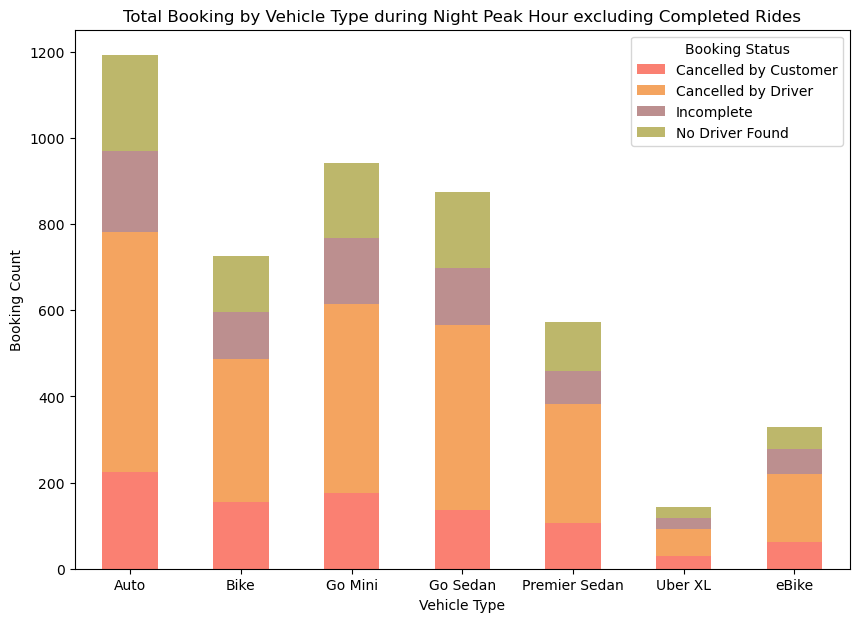

In [12]:
hour_bookings(18,'Total Booking by Vehicle Type during Night Peak Hour excluding Completed Rides')

### Booking Status during Peak Hours Excluding Completed Rides Findings
Across both DAY and NIGHT peak hours, **Cancellation by Driver** was the common Booking Status across all Vehicle Types excluding Completed Rides.

### Bar Charts: Reason for Booking Cancellations from Customers and Drivers

In [13]:
# Create a function that takes a specific hour to return a bar chart of Cancellations by Vehicle Type and Reason for cancellation by CUSTOMER
def hour_cancelled_customer(hour):
    # Filter data for a specific hour
    df_hour = df[df['Hour'] == hour]
    # filter by booking status == "Cancelled by Customer"
    df_cust_can = df_hour[df_hour['Booking Status'] == 'Cancelled by Customer']
    # Group by 'Vehicle Type' and 'Booking Status', then count occurrences
    cust_can_counts = df_cust_can.groupby(['Vehicle Type', 'Reason for cancelling by Customer']).size().reset_index(name='count')
    # Pivot the table to have 'Vehicle Type' as the index and 'Reason for cancelling by Customer' as columns
    cust_can_counts_table = cust_can_counts.pivot(index='Vehicle Type', columns='Reason for cancelling by Customer', values='count').fillna(0)
    # Order by Reason for Cancellation descending
    sorted_order_counts = cust_can_counts_table.sort_values('Vehicle Type', ascending=True)
    # Plotting the bar chart
    sorted_order_counts.plot(kind='bar', stacked=True, figsize=(10, 7),color=['salmon', 'sandybrown', 'rosybrown', 'darkkhaki','cadetblue', 'orchid'])
    # Customize the plot
    plt.title(f'Customer Cancellation by Vehicle Type at {hour}:00')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Booking Count')
    plt.xticks(rotation=0)  # Keep the vehicle types horizontal
    plt.legend(title='Reason for Cancellation', loc='upper right')
    # Display the plot
    plt.show()

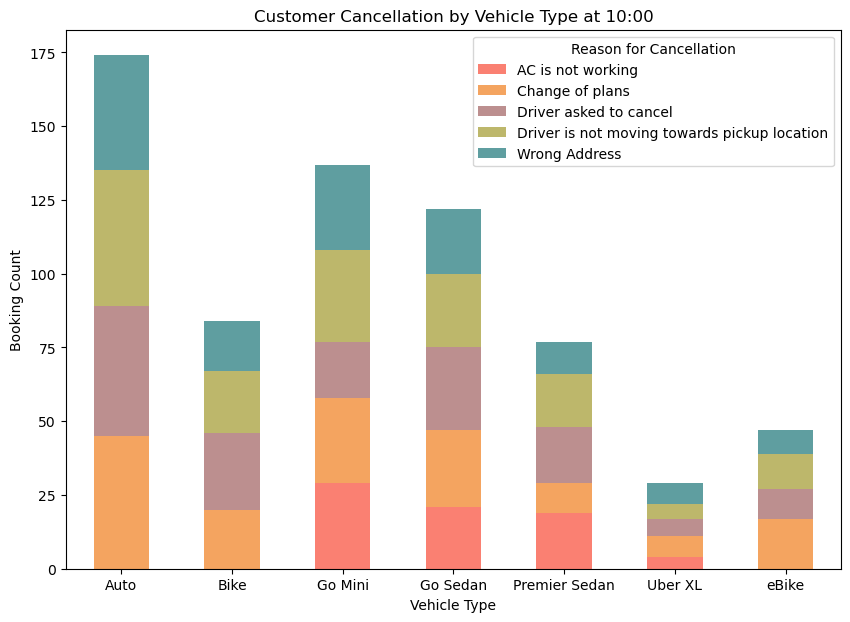

In [14]:
# day peak booking cancellation by customers
hour_cancelled_customer(10)

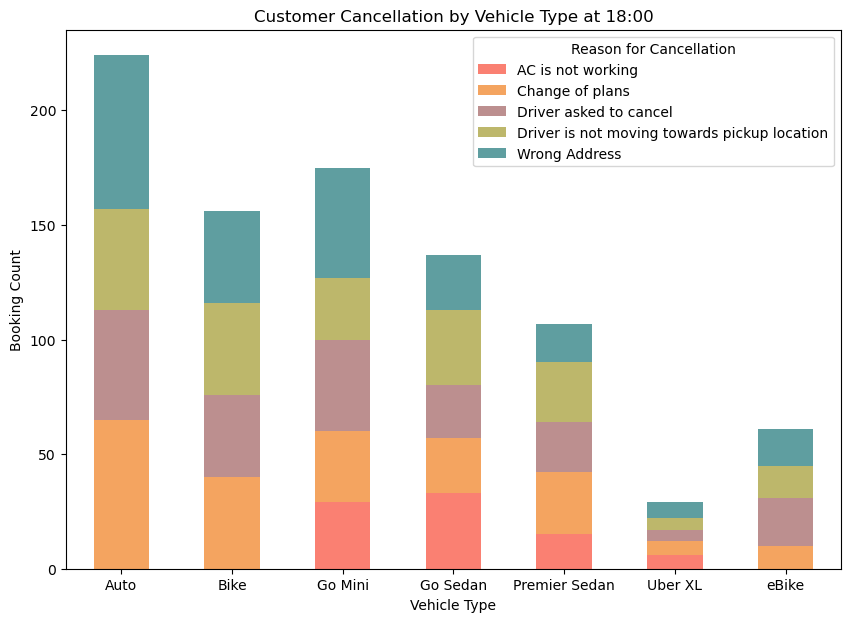

In [15]:
# night peak booking cancellation by customers
hour_cancelled_customer(18)

In [16]:
# Create a function that takes a specific hour to return a bar chart of Cancellations by Vehicle Type and Reason for cancellation by DRIVER
def hour_cancelled_driver(hour):
    # Filter data for a specific hour
    df_hour = df[df['Hour'] == hour]
    # filter by booking status == "Cancelled by Customer"
    df_cust_can = df_hour[df_hour['Booking Status'] == 'Cancelled by Driver']
    # Group by 'Vehicle Type' and 'Booking Status', then count occurrences
    cust_can_counts = df_cust_can.groupby(['Vehicle Type', 'Driver Cancellation Reason']).size().reset_index(name='count')
    # Pivot the table to have 'Vehicle Type' as the index and 'Driver Cancellation Reason' as columns
    cust_can_counts_table = cust_can_counts.pivot(index='Vehicle Type', columns='Driver Cancellation Reason', values='count').fillna(0)
    # Order by Reason for Cancellation descending
    sorted_order_counts = cust_can_counts_table.sort_values('Vehicle Type', ascending=True)
    # Plotting the bar chart
    sorted_order_counts.plot(kind='bar', stacked=True, figsize=(10, 7),color=['salmon', 'sandybrown', 'rosybrown', 'darkkhaki','cadetblue', 'orchid'])
    # Customize the plot
    plt.title(f'Driver Cancellation by Vehicle Type at {hour}:00')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Booking Count')
    plt.xticks(rotation=0)  # Keep the vehicle types horizontal
    plt.legend(title='Reason for Cancellation', loc='upper right')
    # Display the plot
    plt.show()

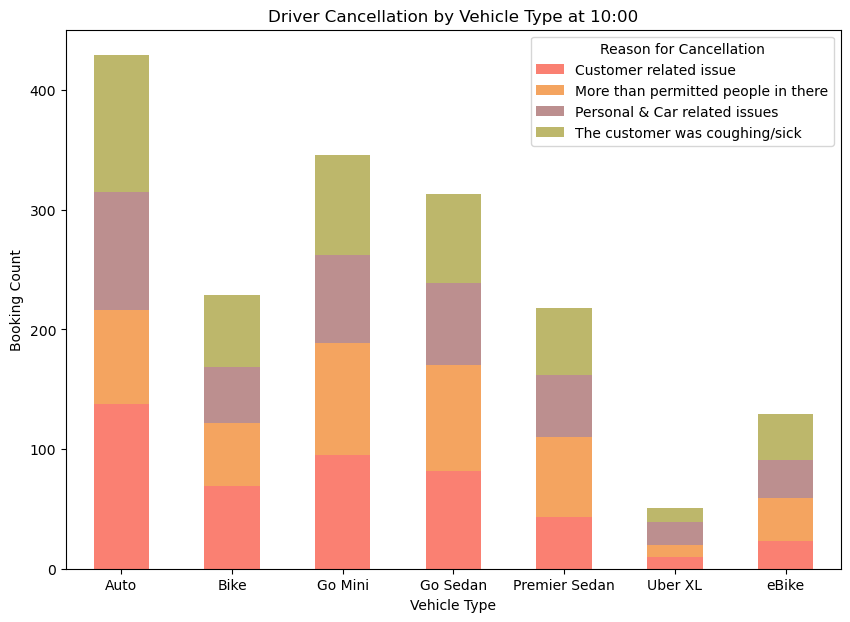

In [17]:
# day peak booking cancellation by drivers
hour_cancelled_driver(10)

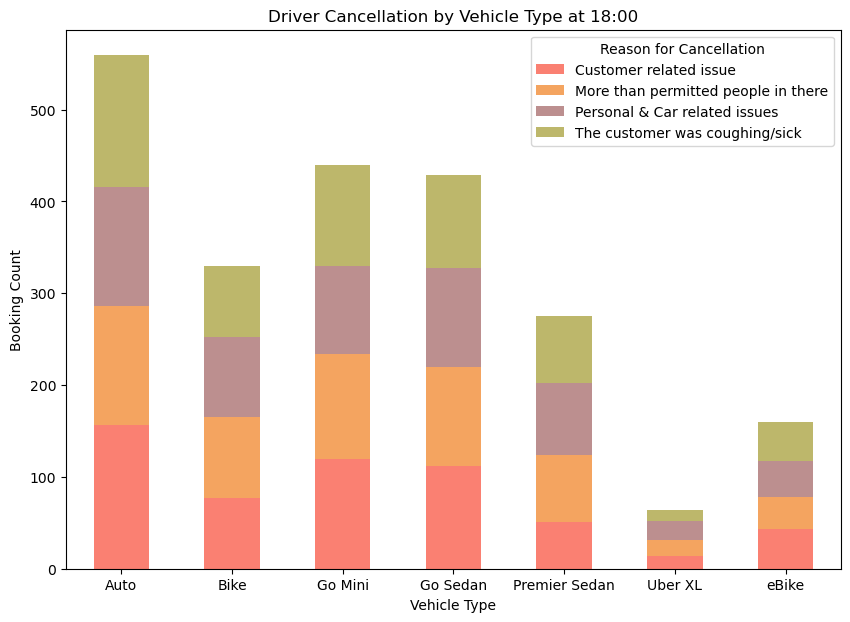

In [18]:
# night peak booking cancellation by drivers
hour_cancelled_driver(18)

### Reason for Booking Cancellations from Customers and Drivers Findings

For the DAY peak, the reason for cancellation by customer across all Vehicle Types differ significantly. 
- Primary reason for cancellation by Customer for Bike, Sedan, Premier Sedan: **Driver asked to cancel** 
- Primary reason for cancellation by Customer for Auto, Go Mini: **Driver is not moving towards pickup location**
- Primary reason for cancellation by Customer for Uber XL, eBike: **change of plans**

For the NIGHT peak, the reason for cancellation by customer across all Vehicle Types differ significantly. 
- Primary reason for cancellation by Customer for Auto: **wrong address** and **change of plans**
- Primary reason for cancellation by Customer for Bike: **Driver is not moving towards pickup location** and **wrong address** 
- Primary reason for cancellation by Customer for Go Mini: **wrong address**
- Primary reason for cancellation by Customer for Go Sedan: **AC is not working** and **Driver is not moving towards pickup location**
- Primary reason for cancellation by Customer for Uber XL: **AC is not working** and **wrong address**
- Primary reason for cancellation by Customer for eBike: **Driver asked to cancel**

Across both DAY and NIGHT peaks, **Customer related issue** and **More than permitted people in there** were the most common reason for cancellation by driver across all Vehicle Types.